# **uv-theory for LJ Chains**

In [1]:
from feos.si import *
from feos.eos import *
from feos.uvtheory import *
#from feos.eos.estimator import *

import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import least_squares
import seaborn as sns
import numpy as np

colors = sns.color_palette("winter", 10)
sns.set_context("talk")
sns.set_style("ticks")

In [6]:
m=5.0
rep = 24.0
att = 6.0
sigma = 1.0
epsilon_k = 1.0

parameters = UVParameters.new_simple(m,rep,att,sigma,epsilon_k)

eos = EquationOfState.uvtheory(parameters,  max_eta=0.5, 
                               perturbation=Perturbation.WeeksChandlerAndersenTPT,
                               chain_contribution=ChainContribution.TPT1
                               # virial_order=VirialOrder.Second
                               # combination_rule=CombinationRule.OneFluidPsi
                              )


s = State(eos,temperature=2.0*KELVIN,density=0.15/(NAV*(sigma*ANGSTROM)**3))

In [11]:
s.density

249.08086007607696 kmol/m³

In [12]:
s.entropy(Contributions.Residual)/KB#/(NAV*KB*s.temperature)

-8.480887132283952

In [13]:
s.helmholtz_energy(Contributions.Residual)/(KB*s.temperature)

0.8055222393665218

In [14]:
rep = 12.0
att = 6.0
sigma = 1.0
epsilon_k = 1.0

In [16]:
# Read Simulation Data from Deiters
deiters_data = pd.read_csv("reference_data/deiters_pure_chains.txt")
#deiters_data.head()

data = {
    'm': [1, 4, 6, 12, 3, 5, 8, 16],
    'Tc': [1.290, 2.260, 2.500, 2.920, 2.041, 2.380, 2.680, 3.080],
    'rho_c': [0.308, 0.264, 0.245, 0.210, 0.274, 0.253, 0.230, 0.200]
}

deiters_cp = pd.DataFrame(data)

# Schultz-Flory analysis of critical point LJ chains

In [41]:
# for mi in np.linspace(1,150):

results = [];
# for mi in [2,3,4,5,6,7,8,9,10,15,20,25,30,40,50,60,120,240,480,920,1640,3280,
for mi in [10,20,30,40,50,100,200,300,400,500,1000,2000,3000,4000,5000,10000,15000,20000,30000,50000,100000,200000,500000,
           1000000,10000000]:
    

    parameters = UVParameters.new_simple(mi, rep, att, sigma, epsilon_k)
    eos = EquationOfState.uvtheory(parameters,  max_eta=0.5, 
                                   perturbation=Perturbation.WeeksChandlerAndersenTPT,
                                   virial_order=VirialOrder.Second,
                                   chain_contribution=ChainContribution.TPT1y
                                   # combination_rule=CombinationRule.OneFluidPsi
                                  )
    state_cp = State.critical_point(eos, initial_temperature=epsilon_k * 50 * KELVIN)
    
    print(mi,mi*state_cp.density/(1/(NAV*(sigma*ANGSTROM)**3)))
    
    results.append((mi,
                    state_cp.temperature/KELVIN, 
                    mi*state_cp.density/(1/(NAV*(sigma*ANGSTROM)**3)),
                    state_cp.density/(1/(NAV*(sigma*ANGSTROM)**3))))


df_crit = pd.DataFrame(results,columns=["m","Tc","rho_s_c","rho_c"]);

10 0.19622148552697893
20 0.16964806703771781
30 0.15371347365159563
40 0.14253436657767105
50 0.13395554404114077
100 0.10746078812208879
200 0.07954950173627175
300 0.0623140894235795
400 0.05100938894844756
500 0.043504171320837774
1000 0.027261961171926967
2000 0.017886035287522847
3000 0.014176015745406383
4000 0.012072506233314444
5000 0.010679155400107892
10000 0.007356183985633293
15000 0.005940316947170661
20000 0.005111481960219357
30000 0.004142380198970041
50000 0.003185156720610061
100000 0.002235964877062694
200000 0.0015731140096523005
500000 0.0009905422870981812
1000000 0.0006988771561933577
10000000 0.00022020839874406866


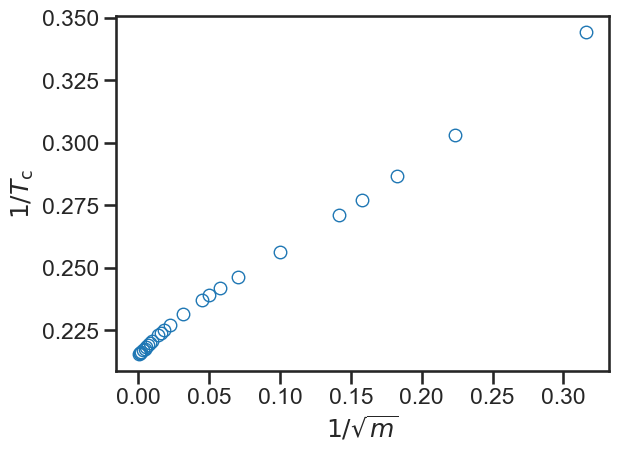

In [42]:
plt.plot(1/np.sqrt(df_crit["m"]),1/df_crit["Tc"],'o',mfc='None')
plt.ylabel(r'$1/T_{\rm c}$')
plt.xlabel(r'$1/\sqrt{m}$')
plt.tight_layout()
plt.savefig('Schultz_Flory_LJchains.pdf')

In [43]:
df_crit

,m,Tc,rho_s_c,rho_c
0,10,2.905225,0.196221,1.962215e-02
1,20,3.297695,0.169648,8.482403e-03
2,30,3.489491,0.153713,5.123782e-03
3,40,3.608453,0.142534,3.563359e-03
4,50,3.691339,0.133956,2.679111e-03
5,100,3.902035,0.107461,1.074608e-03
6,200,4.057459,0.079550,3.977475e-04
7,300,4.132218,0.062314,2.077136e-04
8,400,4.181110,0.051009,1.275235e-04
9,500,4.217218,0.043504,8.700834e-05


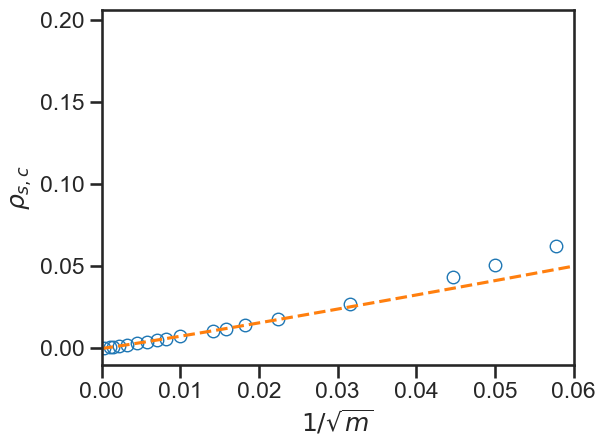

In [44]:
plt.plot(1/df_crit["m"]**(0.5),df_crit["rho_s_c"],'o',mfc='None')

x = np.linspace(0,0.10,100)
y = x
plt.plot(x**0.94,y,'--')

plt.xlim(0,0.06)

plt.ylabel(r'$\rho_{s, c}$')
plt.xlabel(r'$1/\sqrt{m}$')
plt.tight_layout()


# VLE diagrams

In [47]:
minimum_temperatue = 1 * epsilon_k * KELVIN

diagrams = {}

for mi in deiters_data.n.unique():
    parameters = UVParameters.new_simple(mi, rep, att, sigma, epsilon_k)
    eos = EquationOfState.uvtheory(parameters,  max_eta=0.5, 
                                   perturbation=Perturbation.WeeksChandlerAndersenTPT,
                                   virial_order=VirialOrder.Second,
                                   chain_contribution=ChainContribution.TPT1y
                                   # combination_rule=CombinationRule.OneFluidPsi
                                  )
    state_cp = State.critical_point(eos, initial_temperature=epsilon_k * 15 * KELVIN) 
                                    # max_iter=100000, 
                                    # tol=1.e-1)

    
        
    if mi >= 8:
        minimum_temperatue = state_cp.temperature * 0.57
    else:
        minimum_temperatue = state_cp.temperature * 0.4
    
    dia = PhaseDiagram.pure(eos, minimum_temperatue, critical_temperature=epsilon_k * 15 * KELVIN, npoints=200)
    diagrams.update({mi: dia})

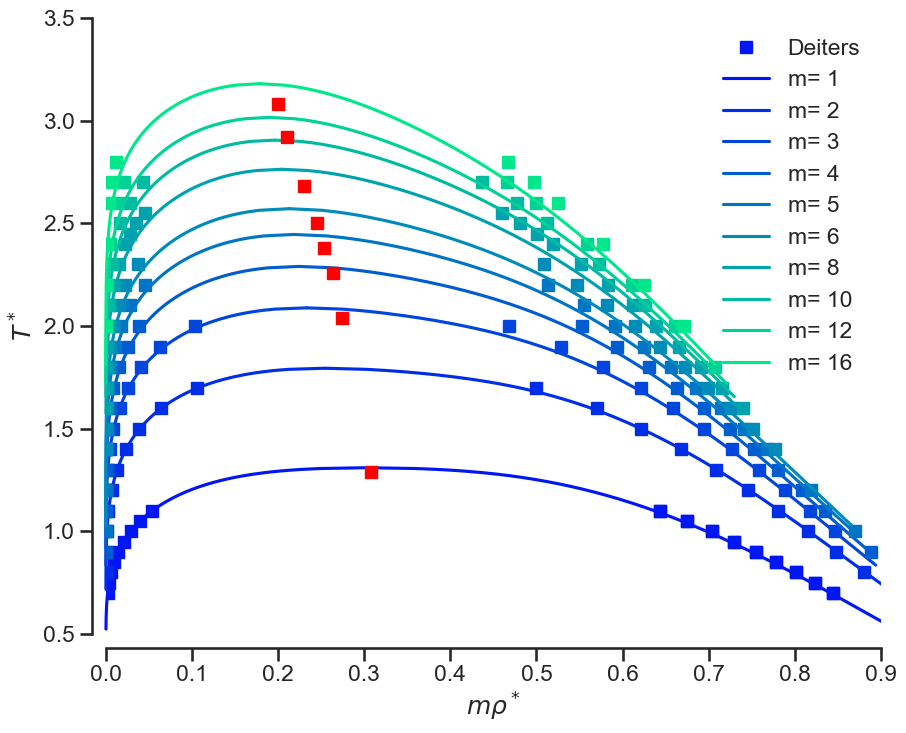

In [48]:
plt.figure(figsize=(10, 8))

for i, (mi, dia) in enumerate(diagrams.items()):
    dd = deiters_data[deiters_data.n == mi]
    if i == 0:
        plt.plot(dd.rhol, dd.t, "s", color=colors[i], label="Deiters")
    plt.plot(dd.rhol, dd.t, "s", color=colors[i])
    plt.plot(dd.rhov, dd.t, "s", color=colors[i])
    
    plt.plot(dia.liquid.density * NAV * (sigma * ANGSTROM)**3 * mi, dia.liquid.temperature / (epsilon_k * KELVIN), color=colors[i], label=f"m= {mi}")
    plt.plot(dia.vapor.density * NAV * (sigma * ANGSTROM)**3 * mi, dia.vapor.temperature / (epsilon_k * KELVIN),color=colors[i], clip_on=False)
    



plt.xlim(0.0, 0.9)
plt.ylim(0.5, 3.5)
sns.despine(offset=10)
plt.legend(frameon=False)
plt.ylabel(r"$T^*$")
plt.xlabel(r"$m\rho^*$");

plt.plot(deiters_cp.rho_c, deiters_cp.Tc, 'rs')

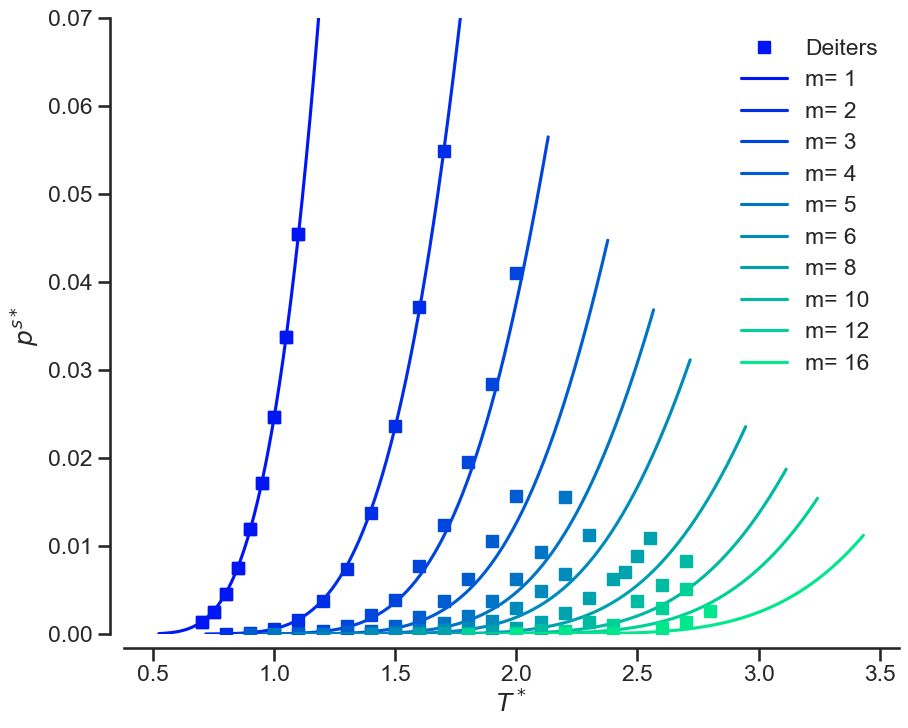

In [23]:
plt.figure(figsize=(10, 8))

for i, (mi, dia) in enumerate(diagrams.items()):
    dd = deiters_data[deiters_data.n == mi]
    if i == 0:
        plt.plot(dd.t, dd.pv, "s", color=colors[i], label="Deiters")
    plt.plot(dd.t, dd.pv, "s", color=colors[i])
    #plt.plot(dd.rhov, dd.t, "s", color=colors[i])
    #print(dia.vapor.pressure * (sigma * ANGSTROM)**3 / (KB * epsilon_k * KELVIN))
    plt.plot( dia.vapor.temperature / (epsilon_k * KELVIN), dia.vapor.pressure * (sigma * ANGSTROM)**3 / (KB * epsilon_k * KELVIN), color=colors[i], label=f"m= {mi}")
    #plt.plot(dia.vapor.density * NAV * (sigma * ANGSTROM)**3 * mi, dia.vapor.temperature / (epsilon_k * KELVIN),color=colors[i], clip_on=False)
    


#plt.xlim(0.0, 0.9)
plt.ylim(0.0, 0.07)
sns.despine(offset=10)
plt.legend(frameon=False)
plt.xlabel(r"$T^*$")
plt.ylabel(r"$p^{s*}$");
#plt.yscale('log')

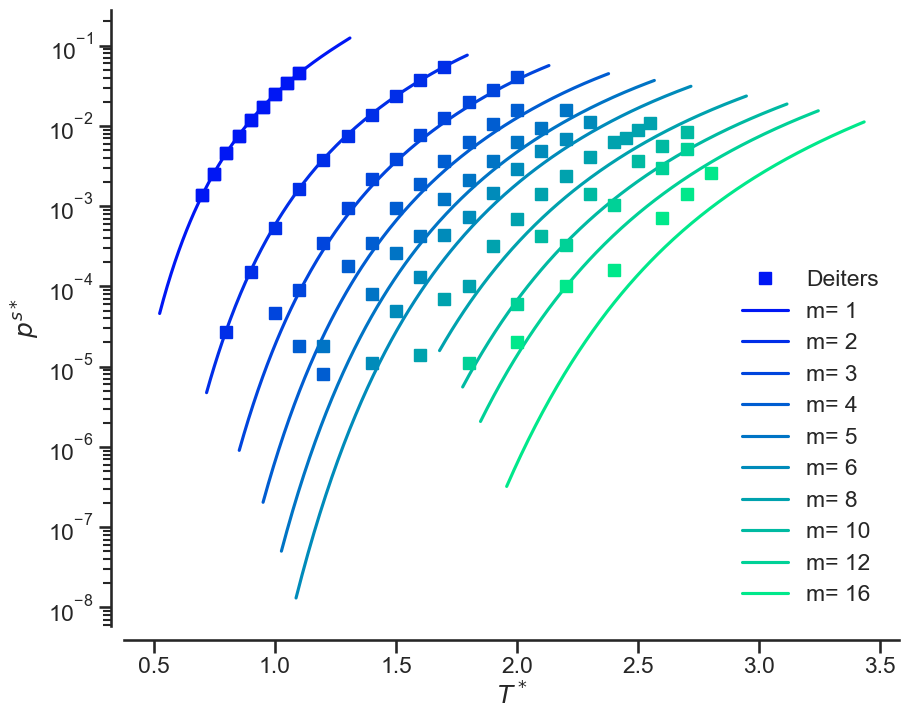

In [24]:
plt.figure(figsize=(10, 8))

for i, (mi, dia) in enumerate(diagrams.items()):
    dd = deiters_data[deiters_data.n == mi]
    if i == 0:
        plt.plot(dd.t, dd.pv, "s", color=colors[i], label="Deiters")
    plt.plot(dd.t, dd.pv, "s", color=colors[i])
    #plt.plot(dd.rhov, dd.t, "s", color=colors[i])
    #print(dia.vapor.pressure * (sigma * ANGSTROM)**3 / (KB * epsilon_k * KELVIN))
    plt.plot( (dia.vapor.temperature / (epsilon_k * KELVIN)), dia.vapor.pressure * (sigma * ANGSTROM)**3 / (KB * epsilon_k * KELVIN), color=colors[i], label=f"m= {mi}")
    #plt.plot(dia.vapor.density * NAV * (sigma * ANGSTROM)**3 * mi, dia.vapor.temperature / (epsilon_k * KELVIN),color=colors[i], clip_on=False)
    


#plt.xlim(0.0, 0.9)
#plt.ylim(0.0, 0.07)
sns.despine(offset=10)
plt.legend(frameon=False)
plt.xlabel(r"$T^*$")
plt.ylabel(r"$p^{s*}$");
plt.yscale('log')

In [8]:
minimum_temperatue = 1 * epsilon_k * KELVIN
#print(minimum_temperatue)

diagrams = {}
mvec = [1, 2,3, 8, 10, 16, 20, 30, 40, 50]
for mi in mvec:
    parameters = UVParameters.new_simple(mi, rep, att, sigma, epsilon_k)
    eos = EquationOfState.uvtheory(parameters, max_eta=0.5, perturbation=Perturbation.BarkerHenderson)
    state_cp = State.critical_point(eos, initial_temperature=epsilon_k * 15 * KELVIN)
    if mi >= 8:
        minimum_temperatue = state_cp.temperature * 0.57
    else:
        minimum_temperatue = state_cp.temperature * 0.4
    dia = PhaseDiagram.pure(eos, minimum_temperatue, critical_temperature=epsilon_k * 15 * KELVIN, npoints=200)
    diagrams.update({mi: dia})

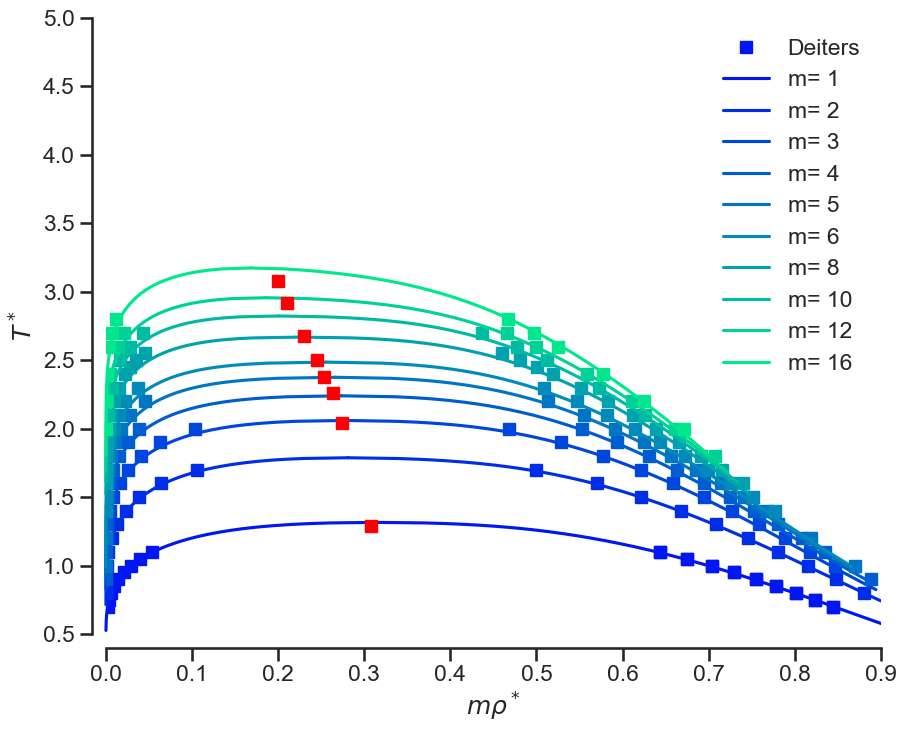

In [13]:
plt.figure(figsize=(10, 8))

for i, (mi, dia) in enumerate(diagrams.items()):
    dd = deiters_data[deiters_data.n == mi]
    if i == 0:
        plt.plot(dd.rhol, dd.t, "s", color=colors[i], label="Deiters")
    plt.plot(dd.rhol, dd.t, "s", color=colors[i])
    plt.plot(dd.rhov, dd.t, "s", color=colors[i])
    
    plt.plot(dia.liquid.density * NAV * (sigma * ANGSTROM)**3 * mi, dia.liquid.temperature / (epsilon_k * KELVIN), color=colors[i], label=f"m= {mi}")
    plt.plot(dia.vapor.density * NAV * (sigma * ANGSTROM)**3 * mi, dia.vapor.temperature / (epsilon_k * KELVIN),color=colors[i], clip_on=False)
    



plt.xlim(0.0, 0.9)
plt.ylim(0.5,5)
sns.despine(offset=10)
plt.legend(frameon=False)
plt.ylabel(r"$T^*$")
plt.xlabel(r"$m\rho^*$");

plt.plot(deiters_cp.rho_c, deiters_cp.Tc, 'rs')